## A simple analysis of determinants of students' performance
  source of data, [kaggle](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

#### Importing the necessary python libraries 

In [1]:
import pandas as pd
import panel as pn
import holoviews as hv
import hvplot.xarray
import hvplot.pandas
import seaborn as sns
pn.extension('tabulator')
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
#pn.extension()

#### Reading in the data

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### exploring the general statistics of the data

In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#### calculating the correlation between study hours and exam score to see if there is a linear relationship between study time and performance.

In [4]:
cor_std_sco = df['Hours_Studied'].corr(df['Exam_Score'])
cor_std_sco

0.44545495407528213

The correlation coefficient above shows there is a positive moderate relationship between study time and exam score, although this is inconsistent, it shows that as students spend more time studying, they tend to have high exam scores. This is in tandem with general expectation.

#### calculating the correlation between class attendance and exam score of the students

In [5]:
cor_att_sco = df['Exam_Score'].corr(df['Attendance'])
cor_att_sco

0.5810718633120644

From the correlation result, it shows there is an inconsistent moderate positive relationship between attending classes and exam score, it means students who attends classes more often are more likely to excel in their exam. This agrees to the apriori expectation.

In [6]:
cor_tut_sco = df['Exam_Score'].corr(df['Tutoring_Sessions'])
cor_tut_sco

0.15652518539225327

#### Using the OLS regression model to predict the data patterns using the **exam score** as the dependent variable(_y_), **hours studied** and **attendance** as the independent variable(_x1, x2_)

In [7]:
x = df[['Hours_Studied', 'Attendance']]
y = df['Exam_Score']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3896.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:11:58   Log-Likelihood:                -15776.
No. Observations:                6607   AIC:                         3.156e+04
Df Residuals:                    6604   BIC:                         3.158e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.6042      0.252    180.743

From the regression result, the **f-statistic** is significant which indicates that at least one predictor(x1,x2) has a statistically significant effect on the dependent variable(y) and the model is fit overall. the **R-Squared** coefficient is **0.541** which shows that **54%** percent of the variation in exam score is explained by study hours and class attendance, which means that other factors accounts for **46%** of the variations in exam score.
The coefficient of study hour is positive and significant at **1%** level, this means that if other factors remains constant, an **extra hour** of study by a student will increase the student's exam score by **0.29**. The coefficient of attendence is positive and significant as well, and it means if a student attends **one** more class, his or her score will increase by **0.19** if other factors remains constant.

#### A graphical representation of the gender of the students  

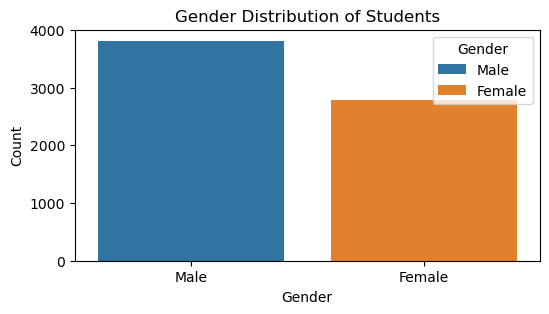

In [8]:
a = plt.figure(figsize=(6, 3))
sns.countplot(x='Gender', data=df, hue='Gender', legend=True)
plt.title('Gender Distribution of Students')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

###### >The graph above shows that there are more males in the class than females

#### A graph showing the level of peer influence on students as classified by their gender.

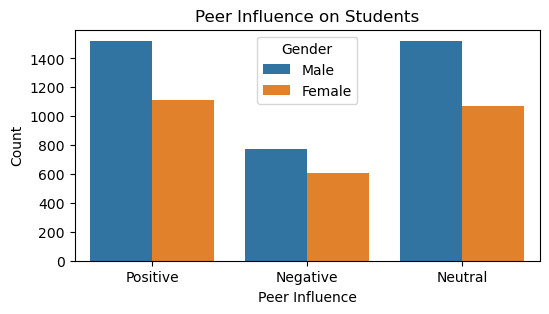

In [9]:
b = plt.figure(figsize=(6, 3))
sns.countplot(x='Peer_Influence', data=df, hue='Gender', legend=True)
plt.title('Peer Influence on Students')
plt.xlabel('Peer Influence')
plt.ylabel('Count')
plt.show()

>The data as represented shows that students who are influenced by their peers are higher than those who are not inflenced by their peers and equal to those who are neutral on peer influence. 

#### Using countplot to present the effect of internet access on students' performance.

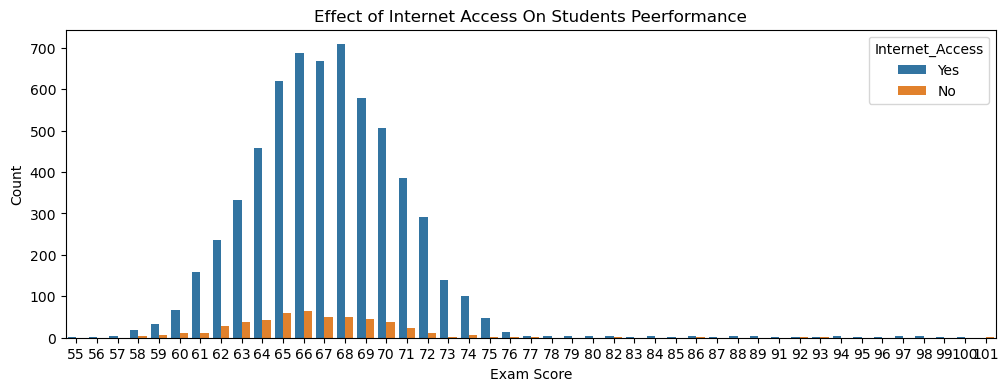

In [10]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Exam_Score', data=df, hue='Internet_Access', legend=True)
plt.title('Effect of Internet Access On Students Peerformance')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

> The data shows that more students had access to the internet and it improved their exam score, although it is inconsistent, this means that other factors like class attendance, sleep hours, study hours, tutoring sessions, also contributes to students' performance.

#### Writing a function to select between parental involvement.

In [11]:
def select_par_inv(parental_inv):
    return df[df['Parental_Involvement'] == parental_inv]

#### Creating a widget to toggle between the parental involvement.

In [12]:
parent_widget = pn.widgets.Select(name='Parent Involvement elect', options=list(df['Parental_Involvement'].unique()))
parent_widget

Select(name='Parent Involvement e..., options=['Low', 'Medium', 'High'], value='Low')

#### Binding the function with the widget

In [13]:
par_inv_df = pn.bind(select_par_inv, parent_widget)

#### Using panel to place the widget in a column

#### A function to plot a scatter plot using hvplot

In [14]:
def plot_par(parental_inv):
    parent = select_par_inv(parental_inv)
    return parent.hvplot.scatter(x='Exam_Score', y=['Hours_Studied', 'Sleep_Hours', 'Attendance'], 
                               title='Study hours, sleep hours, and attendace against Exam scores')  

#### binding the plot function with the widget

In [15]:
c = par_scatter = pn.bind(plot_par, parent_widget)
pn.Row(par_scatter, parent_widget)

Row
    [0] ParamFunction(function, _pane=HoloViews, defer_load=False)
    [1] Select(name='Parent Involvement e..., options=['Low', 'Medium', 'High'], value='Low')

#### A histogram showing the exam scores characterised by family income.

In [16]:
d = df.hvplot.hist(y='Exam_Score', by='Family_Income', alpha=0.6)

#### Making a count plot showing the effect of extracurricular activities on students performance using **Seaborn**

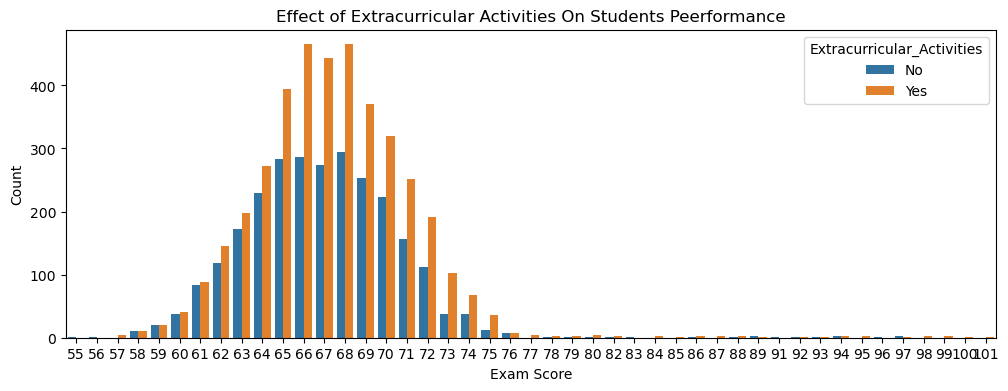

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Exam_Score', data=df, hue='Extracurricular_Activities', legend=True)
plt.title('Effect of Extracurricular Activities On Students Peerformance')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

#### Making a count plot showing the score distribution of the students based on school type using **Seaborn**

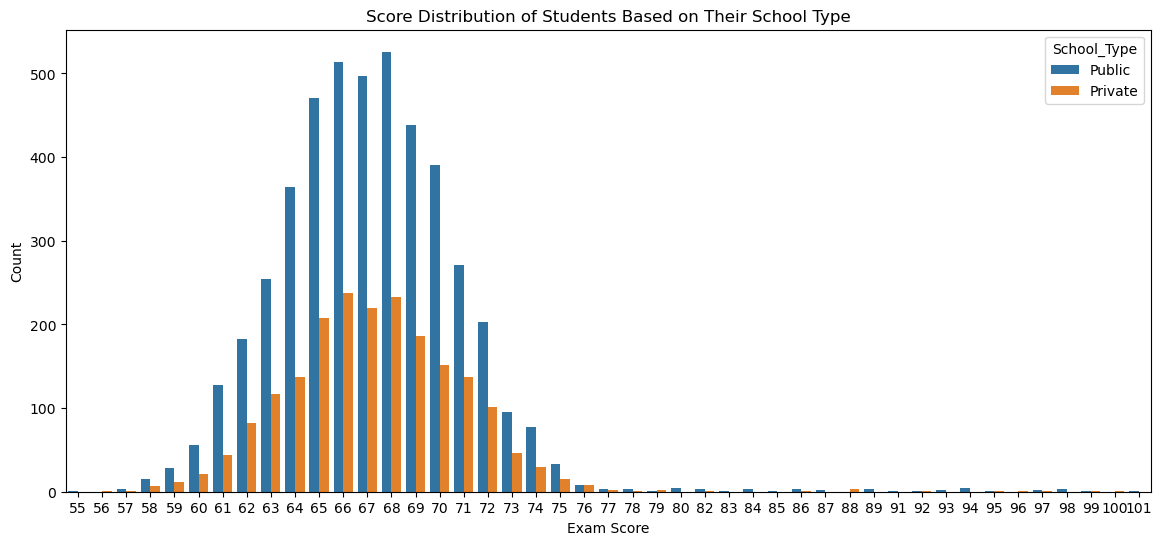

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Exam_Score', data=df, hue='School_Type', legend=True)
plt.title('Score Distribution of Students Based on Their School Type')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

#### Making a count plot showing the sleep hours per day of the students based on their gender using **Seaborn**

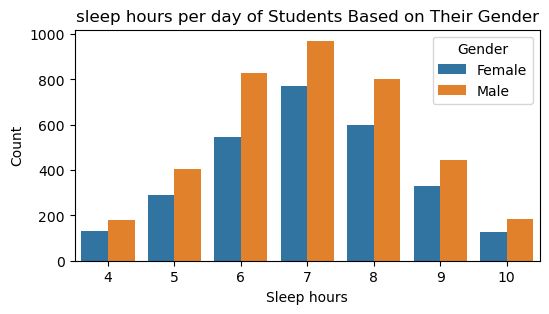

In [19]:
e = plt.figure(figsize=(6, 3))
sns.countplot(x='Sleep_Hours', data=df, hue='Gender', legend=True)
plt.title('sleep hours per day of Students Based on Their Gender')
plt.xlabel('Sleep hours')
plt.ylabel('Count')
plt.show()

#### Making a line plot of exam scores of the students against total hours studied per week using **Seaborn**

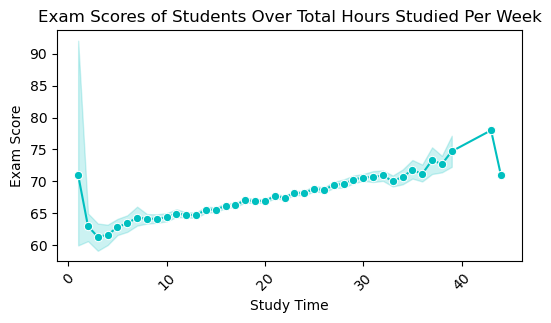

In [20]:
f = plt.figure(figsize=(6, 3))
sns.lineplot(x='Hours_Studied', y='Exam_Score', data=df, marker='o', color='c')
plt.title('Exam Scores of Students Over Total Hours Studied Per Week')
plt.xlabel('Study Time')
plt.ylabel('Exam Score')
plt.xticks(rotation=45)
plt.show()

#### Using hvplot to deploy a datashader to visualise the exam score of the students

In [21]:
g = df.hvplot.scatter(y="Exam_Score", rasterize=True)

### using panel to deploy the entire dataset into a reactive table.

In [22]:
h = df_table = pn.widgets.Tabulator(df, buttons={'Print': "<i class='fa fa-print'></i>"},)


### Instantiating the template with widgets displayed in the sidebar

In [23]:
message = f"Welcome To This App, Enjoy The Visualisation!"

In [24]:
date_picker = pn.widgets.DatePicker(name='DATE', value=dt.datetime.today())

pn.Column(date_picker, height=400)

Column(height=400)
    [0] DatePicker(name='DATE', value=datetime.date(2024, ...)

In [25]:
image= pn.pane.JPG("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1nsR9U1S0BKG04nbsPlGb5u1eml0oQn_w-w&s", height=200)
image

JPG(str, height=200)

In [26]:
ab = pn.panel('## A Visualisation Of Simple Data Analysis of Students Performance Determinants \n _-Using Python [Holoviz, Matplotlib, And Seaborn]._')

In [27]:
template = pn.template.FastListTemplate(
    title="Analysis Of Students Performance-By Ibeto Christian",
    sidebar=[image, message, date_picker],
)
# Append a layout to the main area, to demonstrate the list-like API
template.main.append(
    pn.Column(
        ab,a,b,c,d,e,f,g,h,
    )
)
template.show();

Launching server at http://localhost:50066


AssertionError: 